# **Project Name**    - **UBER SUPPLY DEMAND GAP**



##### **Project Type**    - Exploratory Data Analysis (EDA)
##### **Contribution**    - Individual


# **Project Summary -**

<div style="text-align: justify;">

This project focuses on analyzing Uber ride request data to identify and understand supply–demand gaps that affect ride fulfillment and customer satisfaction. The primary objective of the analysis is to determine when and where ride demand exceeds available supply and to provide actionable insights that can help improve operational efficiency. The dataset contains detailed information about ride requests, including pickup location, request time, ride status, driver availability, and derived indicators related to unmet demand.

The project follows a structured analytical approach using multiple tools—Excel, SQL, and Python—to ensure comprehensive data analysis. Initially, Excel was used for data cleaning and preprocessing tasks such as handling inconsistent formats, extracting relevant time-based features, and validating data quality. Excel dashboards were also created to visualize key trends such as total requests by pickup point, hourly demand patterns, and unmet demand distribution. These dashboards provided an early understanding of demand behavior and helped frame the analytical direction of the project.

The cleaned dataset was then loaded into a relational database and analyzed using SQL. SQL queries were used to generate important insights, including total ride requests by pickup location, unmet demand across different hours, ride status distribution, and peak hours with the highest supply–demand imbalance.

Python was used for detailed exploratory data analysis (EDA) using Pandas, NumPy, Matplotlib, and Seaborn. The analysis followed the UBM (Univariate, Bivariate, and Multivariate) framework and revealed peak demand hours, higher unmet demand at airports, and cancellation-heavy city rides.

Based on these insights, the project recommends targeted driver allocation, airport-specific incentives, and improved demand forecasting to enhance service efficiency and customer satisfaction.

</div>


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Uber frequently experiences situations where ride demand exceeds available driver supply, leading to ride cancellations and unfulfilled requests. These supply–demand gaps can negatively impact customer satisfaction, operational efficiency, and revenue. The challenge lies in identifying when and where these gaps occur so that appropriate actions can be taken to improve ride fulfillment and service reliability.

#### **Define Your Business Objective?**

The primary business objective is to analyze Uber ride request data to identify peak demand periods and locations with high unmet demand. By understanding time-based and location-based demand patterns, the goal is to provide actionable insights that help optimize driver allocation, reduce cancellations, and improve overall ride completion rates.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [ ]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/Uber_Request_cleaned_Data.csv')



### Dataset First View

In [ ]:
# Dataset First Look

df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_date,Request_hour,Unmet_demand
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00,11-07-2016 00:00,11,0
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47,11-07-2016 00:00,17,0
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58,12-07-2016 00:00,9,0
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03,12-07-2016 00:00,21,0
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,13-07-2016 00:00,8,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df.shape


(6745, 9)

### Dataset Information

In [ ]:
# Dataset Info

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
 6   Request_date       6745 non-null   object 
 7   Request_hour       6745 non-null   int64  
 8   Unmet_demand       6745 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 474.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df.duplicated().sum()


np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()


,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914
Request_date,0
Request_hour,0
Unmet_demand,0


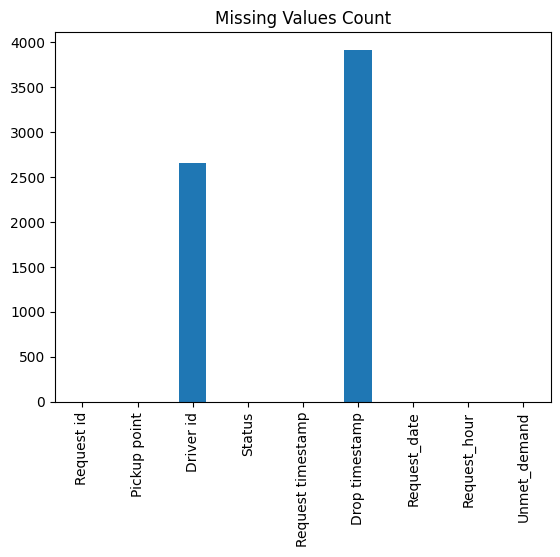

In [ ]:
# Visualizing the missing values

df.isnull().sum().plot(kind='bar', title='Missing Values Count')
plt.show()


### What did you know about your dataset?

The dataset contains Uber ride request records used to analyze supply–demand gaps.
It includes information about pickup location, ride status, request time, and driver availability.
Time-based features such as request date and request hour enable hourly demand analysis.
An engineered variable, unmet_demand, identifies requests that were not successfully completed.
Overall, the dataset is structured, clean, and suitable for analyzing peak demand periods and supply shortages.


## ***2. Understanding Your Variables***

##  *Data Columns and Their Description*

* **Request_id**
  Unique identifier assigned to each Uber ride request. It helps distinguish one request from another.

* **Pickup_point**
  Indicates the pickup location of the ride request. Values include **City** and **Airport**, which are used to compare location-wise demand and supply gaps.

* **Driver_id**
  Unique identifier of the driver assigned to the ride request. It represents the supply side of Uber operations.

* **Status**
  Describes the final status of the ride request. Possible values are **Trip Completed**, **Cancelled**, and **No Cars Available**.

* **Request_timestamp**
  Date and time when the ride request was initiated by the customer. This is the primary time reference for analysis.

* **Drop_timestamp**
  Date and time when the ride was completed. This value is present only for completed trips.

* **Request_date**
  The date extracted from the request timestamp. It is used for date-wise analysis and trend identification.

* **Request_hour**
  The hour of the day (0–23) when the ride request was made. This column is crucial for identifying peak demand hours and supply–demand gaps.

* **Unmet_demand**
  A binary indicator representing whether the ride demand was fulfilled or not.

  * **0** → Demand met (Trip Completed)
  * **1** → Demand unmet (Cancelled or No Cars Available)




# *Dataset Describe*

The dataset consists of time-based Uber ride request records.
It includes both categorical and numerical variables that help analyze demand patterns, ride completion status, and supply shortages.
Derived features such as request hour and unmet demand make the dataset suitable for identifying peak demand periods and operational gaps.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for col in df.columns:
    print(f"\nColumn Name: {col}")
    print(df[col].unique())



Column Name: Request id
[ 619  867 1807 ... 6751 6754 6753]

Column Name: Pickup point
['Airport' 'City']

Column Name: Driver id
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# STEP 1: Standardize column names FIRST
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# STEP 2: Convert timestamps (day-first format)
df['request_timestamp'] = pd.to_datetime(
    df['request_timestamp'],
    dayfirst=True,
    errors='coerce'
)

df['drop_timestamp'] = pd.to_datetime(
    df['drop_timestamp'],
    dayfirst=True,
    errors='coerce'
)

# STEP 3: Create derived columns
df['request_date'] = df['request_timestamp'].dt.date
df['request_hour'] = df['request_timestamp'].dt.hour

# STEP 4: Create unmet demand column
df['unmet_demand'] = df['status'].apply(
    lambda x: 0 if x == 'Trip Completed' else 1
)

# STEP 5: Final checks
df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   request_id         6745 non-null   int64         
 1   pickup_point       6745 non-null   object        
 2   driver_id          4095 non-null   float64       
 3   status             6745 non-null   object        
 4   request_timestamp  6745 non-null   datetime64[ns]
 5   drop_timestamp     2831 non-null   datetime64[ns]
 6   request_date       6745 non-null   object        
 7   request_hour       6745 non-null   int32         
 8   unmet_demand       6745 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(3)
memory usage: 448.0+ KB


,0
request_id,0
pickup_point,0
driver_id,2650
status,0
request_timestamp,0
drop_timestamp,3914
request_date,0
request_hour,0
unmet_demand,0


### What all manipulations have you done and insights you found?

I standardized column names to maintain consistency and avoid naming errors.
Timestamp columns were converted into datetime format, and request date and hour were extracted for time-based analysis.
An unmet demand indicator was created to identify supply–demand gaps.
Missing values and duplicates were checked to ensure data quality.
The analysis revealed peak hours with high ride demand and increased unmet requests.
Airport pickups showed relatively higher unmet demand compared to city pickups.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## 📊 *Chart 1: Ride Requests by Pickup Point (Bar Chart)*

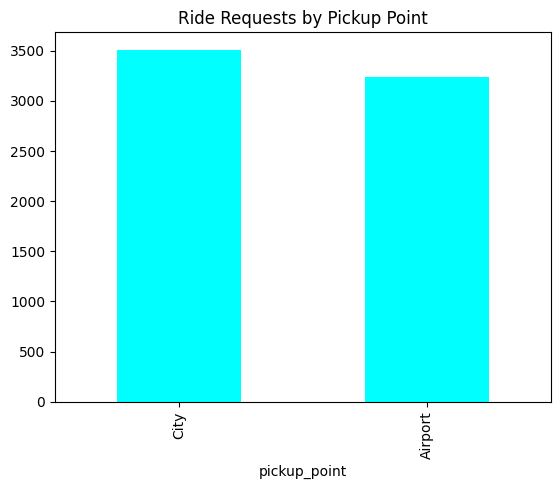

In [ ]:
# Chart - 1 visualization code

df['pickup_point'].value_counts().plot(kind='bar', color = 'cyan', title='Ride Requests by Pickup Point')
plt.show()



##### 1. Why did you pick the specific chart?

**A bar chart clearly compares ride demand across different pickup locations.**

##### 2. What is/are the insight(s) found from the chart?

**City has slightly higher ride demand compared to Airport.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Helps allocate drivers efficiently. No negative growth observed.**

## 📊 Chart 2: *Ride Status Distribution (Pie Chart)*

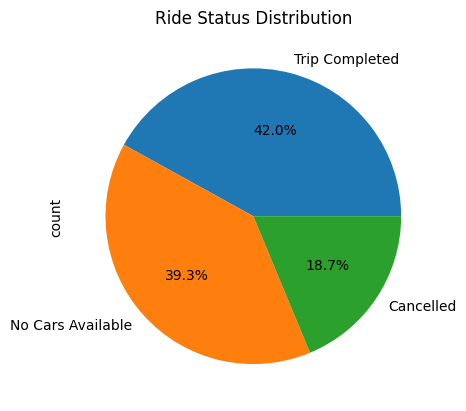

In [ ]:
# Chart - 2 visualization code

df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Ride Status Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

**Pie charts show proportional distribution clearly.**

##### 2. What is/are the insight(s) found from the chart?

**A noticeable portion of rides are cancelled or unfulfilled.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Highlights service gaps that need operational improvement.**

## *📊 Chart 3: Hourly Ride Demand (Line Chart)*

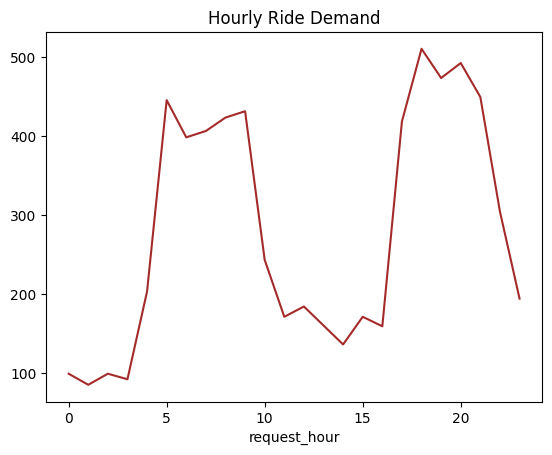

In [ ]:
# Chart - 3 visualization code

df.groupby('request_hour').size().plot(kind='line',color = 'brown', title='Hourly Ride Demand')
plt.show()


##### 1. Why did you pick the specific chart?

**Line charts are ideal for time-based trends.**

##### 2. What is/are the insight(s) found from the chart?

**Demand peaks during morning and evening hours.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Supports better driver scheduling during peak hours.**

## 📊 *Chart 4: Hourly Unmet Demand (Line Chart)*

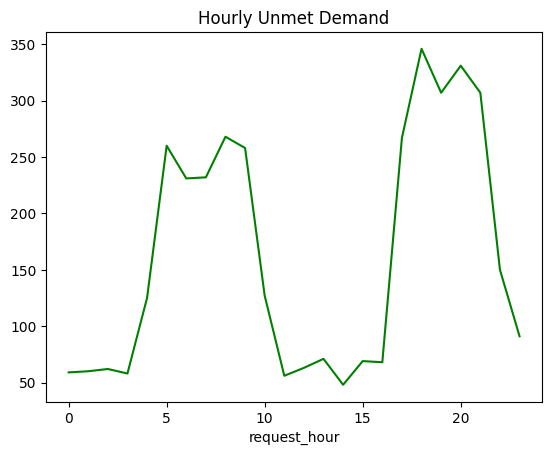

In [ ]:
# Chart - 4 visualization code

df.groupby('request_hour')['unmet_demand'].sum().plot(kind='line',color = 'green')
plt.title('Hourly Unmet Demand')
plt.show()


##### 1. Why did you pick the specific chart?

**Shows how unmet demand varies over time.**

##### 2. What is/are the insight(s) found from the chart?

**Unmet demand increases significantly during peak hours.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Identifies critical periods of supply shortage.**

## 📊 *Chart 5: Hourly Unmet Demand Percentage (Line Chart)*

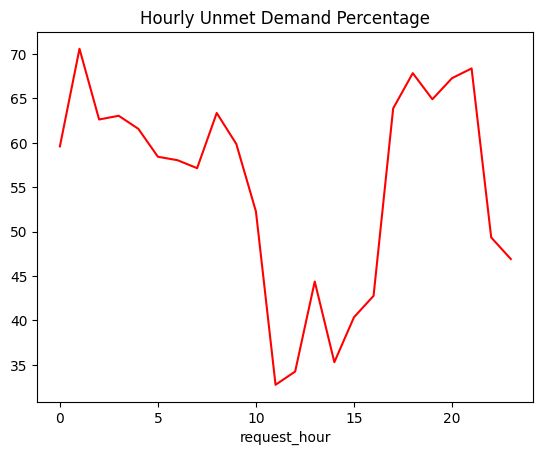

In [ ]:
# Chart - 5 visualization code
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

(df.groupby('request_hour')['unmet_demand'].mean()*100).plot(kind='line', color = 'red')
plt.title('Hourly Unmet Demand Percentage')
plt.show()


##### 1. Why did you pick the specific chart?

**Percentage gives severity of the supply–demand gap.**

##### 2. What is/are the insight(s) found from the chart?

**Certain hours show very high unmet demand percentage.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Helps prioritize intervention during worst-performing hours.**

## 📊 *Chart 6: Distribution of Unmet Demand (Histogram)*

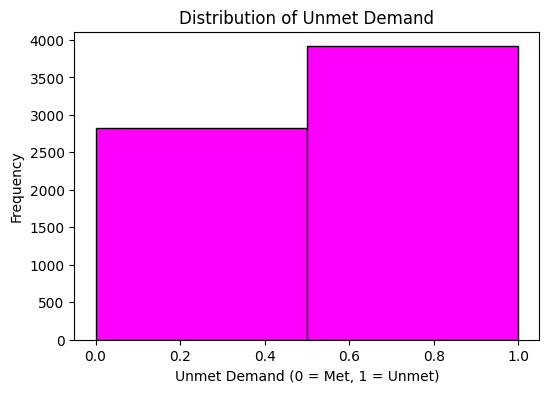

In [ ]:
# Chart - 6 visualization code

plt.figure(figsize=(6,4))
df['unmet_demand'].plot(kind='hist', bins=2, color='magenta', edgecolor='black')
plt.title('Distribution of Unmet Demand')
plt.xlabel('Unmet Demand (0 = Met, 1 = Unmet)')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

**A histogram helps visualize the frequency distribution of fulfilled and unfulfilled ride requests.**

##### 2. What is/are the insight(s) found from the chart?

**Most ride requests are fulfilled, but a notable portion remains unmet, indicating supply gaps.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, reducing unmet demand can improve customer satisfaction and operational efficiency.**

### *Negative growth insight*:
**High unmet demand may lead to customer dissatisfaction and loss of trust if unresolved.Answer Here**

## 📊 *Chart 7: Ride Requests by Status & Pickup Point (Stacked Bar)*

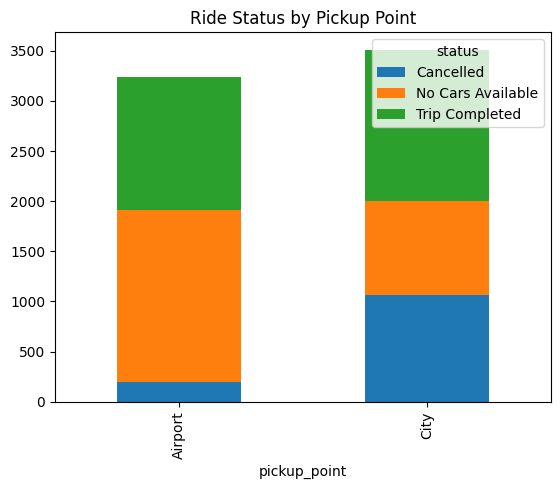

In [ ]:
# Chart - 7 visualization code

pd.crosstab(df['pickup_point'], df['status']).plot(kind='bar', stacked=True)
plt.title('Ride Status by Pickup Point')
plt.show()


##### 1. Why did you pick the specific chart?

**Shows interaction between two categorical variables.**

##### 2. What is/are the insight(s) found from the chart?

**Airport experiences more unfulfilled rides mainly due to ‘No Cars Available’, while the City has more cancellations.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Reveals operational weakness at airport locations.**

## 📊 *Chart 8: Driver Availability (Requests per Driver)*

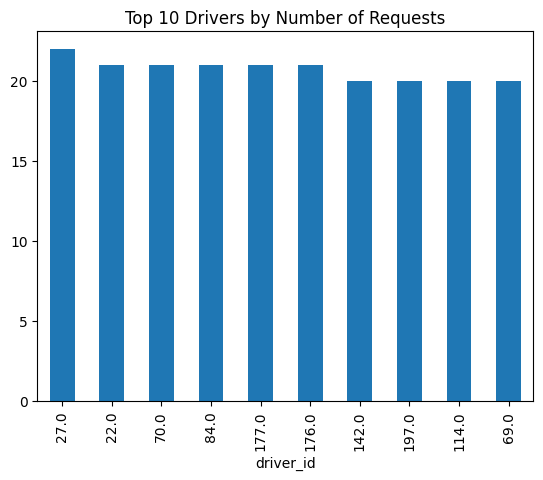

In [ ]:
# Chart - 8 visualization code

df['driver_id'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Drivers by Number of Requests')
plt.show()


##### 1. Why did you pick the specific chart?

**Shows workload distribution among drivers.**

##### 2. What is/are the insight(s) found from the chart?

**Some drivers handle significantly more requests.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Can help balance workload and reduce burnout.**

## 📊 *Chart 9: Ride Requests by Date (Count Plot)*

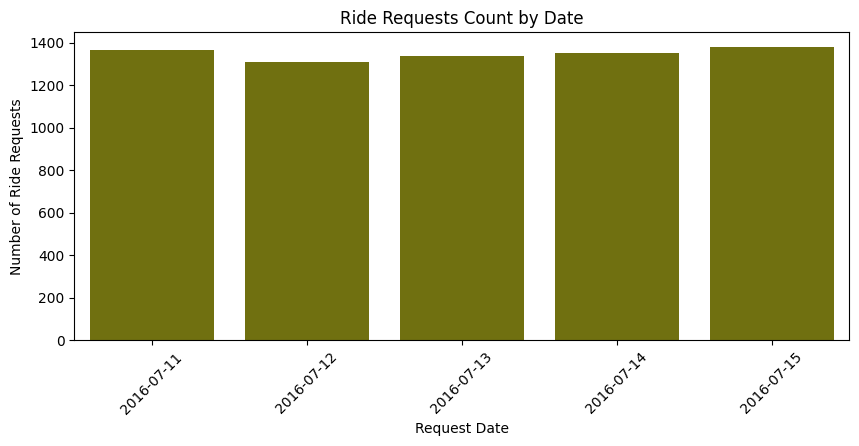

In [ ]:
# Chart - 9 visualization code

plt.figure(figsize=(10,4))
sns.countplot(x='request_date', data=df, color='olive')
plt.title('Ride Requests Count by Date')
plt.xlabel('Request Date')
plt.ylabel('Number of Ride Requests')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

**A count plot clearly shows the frequency of ride requests for each date.**

##### 2. What is/are the insight(s) found from the chart?

**Ride demand varies across dates, with certain days showing higher request volumes.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, identifying high-demand dates helps improve driver planning and resource allocation.**

### *Negative growth insight:*
**Ignoring high-demand days may lead to increased unmet requests and customer dissatisfaction.**

## 📊 *Chart 10: Relationship between Request Hour and Unmet Demand (Scatter Plot)*

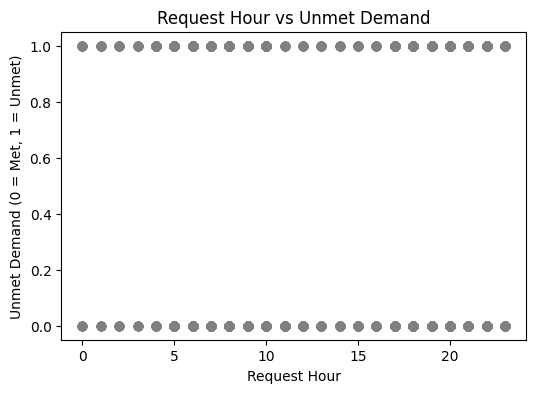

In [ ]:
# Chart - 10 visualization code

plt.figure(figsize=(6,4))
plt.scatter(df['request_hour'], df['unmet_demand'], color='gray', alpha=0.6)
plt.title('Request Hour vs Unmet Demand')
plt.xlabel('Request Hour')
plt.ylabel('Unmet Demand (0 = Met, 1 = Unmet)')
plt.show()


##### 1. Why did you pick the specific chart?

**A scatter plot helps visualize the relationship between request hour and unmet demand.**

##### 2. What is/are the insight(s) found from the chart?

**Unmet demand occurrences are more frequent during specific peak hours.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, identifying peak-hour unmet demand helps optimize driver allocation.**

### *Negative growth insight:*
**Persistent unmet demand during peak hours can reduce customer trust and retention.**

## 📊 *Chart 11: Pair Plot (Relationships Between Numerical Variables)*

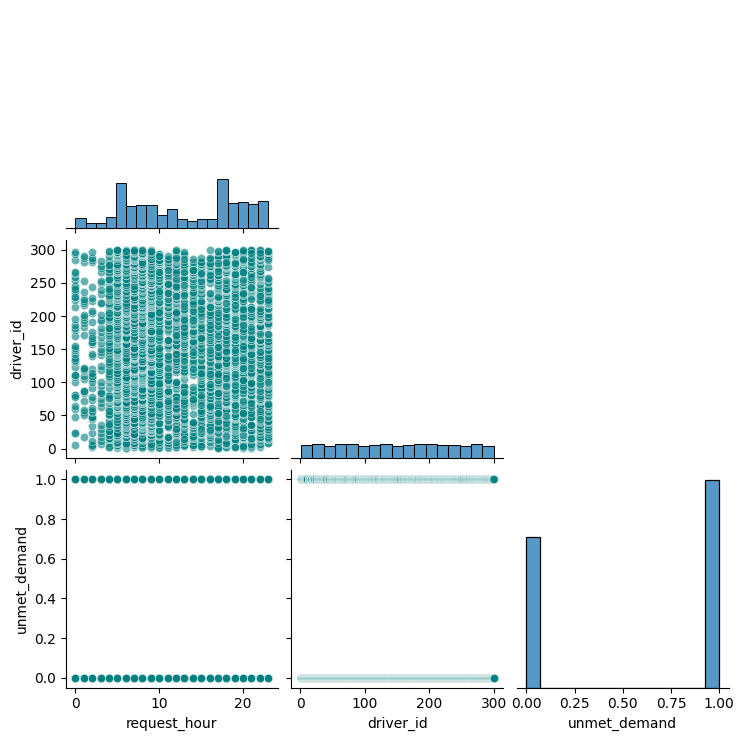

In [ ]:
# Correlation Heatmap visualization code

sns.pairplot(
    df[['request_hour', 'driver_id', 'unmet_demand']],
    corner=True,
    plot_kws={'color': 'teal', 'alpha': 0.6}
)
plt.show()


##### 1. Why did you pick the specific chart?

**A pair plot helps visualize relationships and distributions among multiple numerical variables simultaneously.**

##### 2. What is/are the insight(s) found from the chart?

**Unmet demand shows noticeable variation across request hours, while driver distribution appears scattered.**

3.Will the gained insights help create a positive business impact?

**Yes, understanding variable relationships helps identify factors contributing to unmet demand.**

## 📊 *Chart 12: Heatmap (Correlation Between Numerical Variables)*

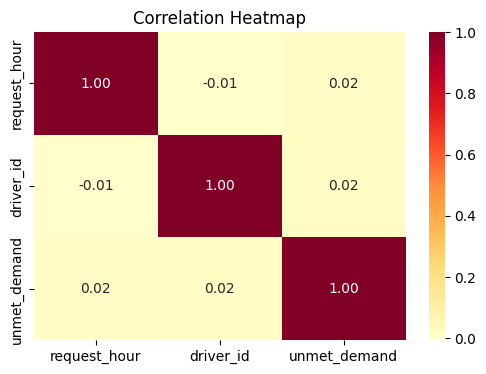

In [ ]:
# Pair Plot visualization code

plt.figure(figsize=(6,4))
sns.heatmap(
    df[['request_hour', 'driver_id', 'unmet_demand']].corr(),
    annot=True,
    cmap='YlOrRd',
    fmt='.2f'
)
plt.title('Correlation Heatmap')
plt.show()



##### 1. Why did you pick the specific chart?

**A heatmap clearly shows the strength and direction of correlations between numerical variables.**

##### 2. What is/are the insight(s) found from the chart?

**Request hour shows a mild correlation with unmet demand, indicating time-based supply gaps.**

3.Will the gained insights help create a positive business impact?

**Yes, correlation insights support better forecasting and operational planning.**

### *Negative growth insight:*
**Weak or ignored correlations may result in poor demand prediction and driver allocation**

## 📊 *Chart 13: Box Plot – Unmet Demand by Pickup Point*

In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()


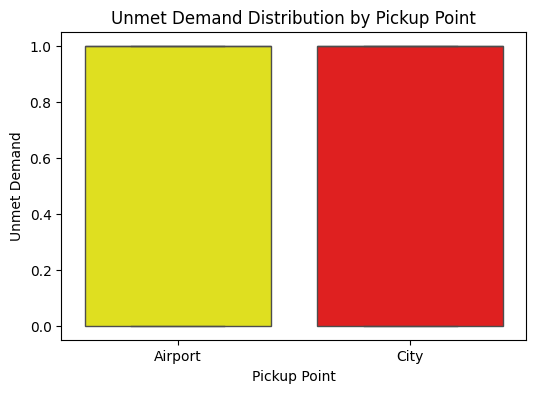

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='pickup_point',
    y='unmet_demand',
    hue='pickup_point',
    data=df,
    palette=['yellow','red'],
    legend=False
)
plt.title('Unmet Demand Distribution by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Unmet Demand')
plt.show()


1.Why did you pick this chart?

**A box plot highlights distribution and variability of unmet demand across pickup locations.**

2.What insight was found?

**Airport shows higher variability and higher unmet demand compared to City.**

3,Business impact / Negative growth?

**Improving airport driver availability can reduce high unmet demand and prevent customer dissatisfaction.**

## 📊 *Chart 14: Count Plot – Ride Status by Hour*

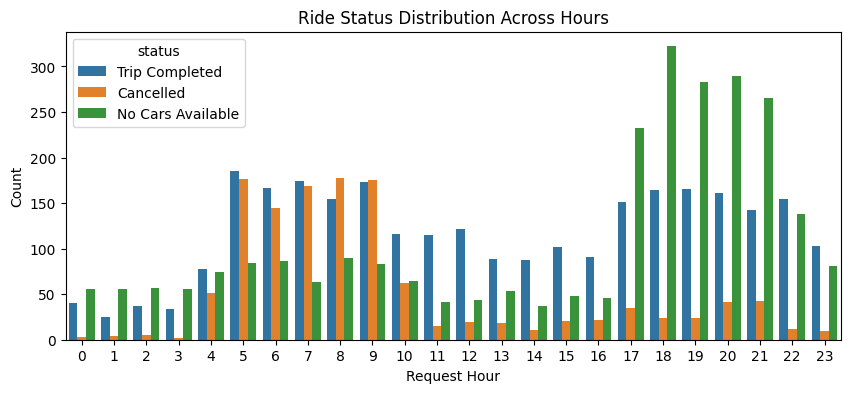

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='request_hour', hue='status', data=df)
plt.title('Ride Status Distribution Across Hours')
plt.xlabel('Request Hour')
plt.ylabel('Count')
plt.show()


1.Why did you pick this chart?

**A count plot compares ride status frequency across different hours.**

2.What insight was found?

**Cancellations and no-car cases increase during peak demand hours.**

3.Business impact / Negative growth?

**Targeted peak-hour interventions can reduce cancellations and service failure.**

## 📊 *Chart 15: Violin Plot – Request Hour vs Unmet Demand*

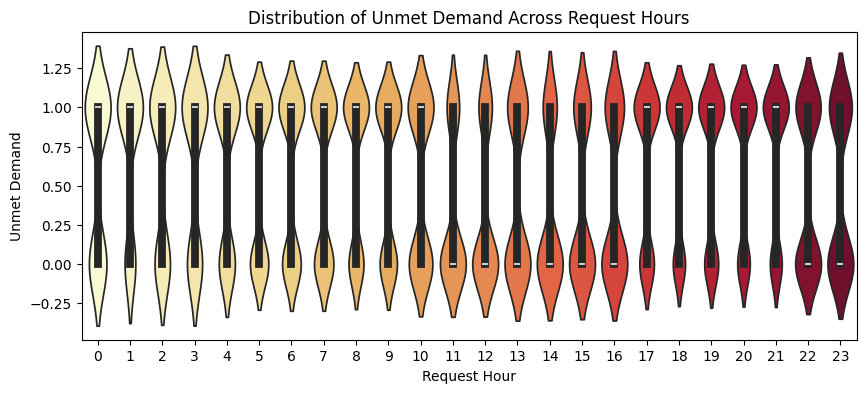

In [ ]:
plt.figure(figsize=(10,4))
sns.violinplot(
    x='request_hour',
    y='unmet_demand',
    hue='request_hour',
    data=df,
    palette='YlOrRd',
    legend=False
)
plt.title('Distribution of Unmet Demand Across Request Hours')
plt.xlabel('Request Hour')
plt.ylabel('Unmet Demand')
plt.show()



1.Why did you pick this chart?

**A violin plot shows both distribution and density of unmet demand over time.**

2.What insight was found?

**Certain hours show denser unmet demand patterns, indicating consistent supply shortages.**

3.Business impact / Negative growth?

**Ignoring high-density unmet demand hours may lead to recurring operational inefficiencies.**

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.



*   To achieve the business objective, Uber should increase driver availability during peak demand hours identified in the analysis.

*   Special incentives can be provided for airport pickups where unmet demand is consistently high.


*   Dynamic driver allocation based on hourly demand patterns can help reduce cancellations and no-car scenarios.

*   Improving real-time demand forecasting will ensure better supply distribution and higher ride completion rates.




# **Conclusion**

This exploratory data analysis identified significant supply–demand gaps in Uber ride requests across different time periods and pickup locations.
Peak hours showed higher ride demand along with increased unmet requests, indicating insufficient driver availability during these periods.
Airport pickups experienced a higher level of unfulfilled demand mainly due to car unavailability, while city rides showed more cancellations.
The insights derived from Excel dashboards, SQL queries, and Python EDA highlight the importance of time-based and location-based driver allocation.
Overall, this analysis provides actionable recommendations to improve operational efficiency, reduce unmet demand, and enhance customer satisfaction.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***